In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional


In [2]:
# Set random seed to get the same result after each time running the code
tf.random.set_seed(1234)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
file = 'output.csv'
df = pd.read_csv("/content/drive/MyDrive/Crypto_Prediction/Dataset/output.csv")
df.drop(['Unnamed: 0.1'], axis=1)


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,high,low,open,close,volume,adj_close,Vader_Comp,Vader_Pos,Vader_Neg,Vader_Neu
0,0,Will Roadhouse | CEO | Roadhouse International,USA & Thailand Hotel Listings,USA - Thailand - Costa Rica\nOff-Market Hotel ...,2009-03-16 18:36:15,9150.0,128.0,47.0,False,2021-07-05,...,35284.343750,33213.660156,35284.343750,33746.003906,2.672155e+10,33746.003906,0.0000,0.000,0.000,1.000
1,1,PlattsburghBTC,"Plattsburgh, NY","฿ miner that sells extra GH, so come mine with...",2015-08-29 17:25:50,3447.0,1818.0,291.0,False,2021-07-05,...,35284.343750,33213.660156,35284.343750,33746.003906,2.672155e+10,33746.003906,0.0000,0.000,0.000,1.000
2,2,🌋TripleVolcanoBTCGang🌋,teh Mewn,Volcano Pleb. 39.9K #BTC Gang forever. Tweets ...,2020-05-31 02:08:03,155.0,648.0,7276.0,False,2021-07-05,...,35284.343750,33213.660156,35284.343750,33746.003906,2.672155e+10,33746.003906,0.0000,0.000,0.000,1.000
3,3,"Zhongshan Liren aka ""Sushi Satoshi""",Hong Kong,Love #bitcoin #ethereum\nHourly chart analysis...,2012-02-11 06:43:12,131.0,593.0,2417.0,False,2021-07-05,...,35284.343750,33213.660156,35284.343750,33746.003906,2.672155e+10,33746.003906,-0.3182,0.000,0.268,0.732
4,4,• RIS BIG WIN 🐿,"Calabarzon, Republic of the Ph",MA•PA💛,2018-01-13 07:25:36,126.0,2326.0,17207.0,False,2021-07-05,...,35284.343750,33213.660156,35284.343750,33746.003906,2.672155e+10,33746.003906,0.3595,0.128,0.000,0.872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586669,1586669,Girl Gone Crypto #NAAcrew,Istanbul,#NAAcrew team is analyzing the pair you want. ...,2012-04-28 15:10:49,45451.0,38154.0,28.0,False,2022-07-11,...,20856.353516,19924.539063,20856.353516,19970.556641,2.415025e+10,19970.556641,0.4019,0.080,0.000,0.920
1586670,1586670,CRYPTO PUMP,⚖️,JOIN THE 💯 CLUB https://t.co/95Mnu4nAee None o...,2011-03-12 21:07:47,19857.0,12463.0,5750.0,False,2022-07-11,...,20856.353516,19924.539063,20856.353516,19970.556641,2.415025e+10,19970.556641,-0.6369,0.028,0.108,0.864
1586671,1586671,afsheenjafry,Dunstable,"""You were wild once. Don't let them tame you.....",2013-01-16 11:03:34,5077.0,2581.0,4941.0,False,2022-07-11,...,20856.353516,19924.539063,20856.353516,19970.556641,2.415025e+10,19970.556641,0.0000,0.000,0.000,1.000
1586672,1586672,Maral Nouri - Paris,"Dubai, United Arab Emirates",Let's talk crypto: https://t.co/9Uor9mbrnP & h...,2020-04-13 18:39:01,5501.0,219.0,1298.0,False,2022-07-11,...,20856.353516,19924.539063,20856.353516,19970.556641,2.415025e+10,19970.556641,0.8750,0.263,0.000,0.737


In [5]:

df=df.drop(['Unnamed: 0.1'], axis=1)
df.columns

Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet',
       'high', 'low', 'open', 'close', 'volume', 'adj_close', 'Vader_Comp',
       'Vader_Pos', 'Vader_Neg', 'Vader_Neu'],
      dtype='object')

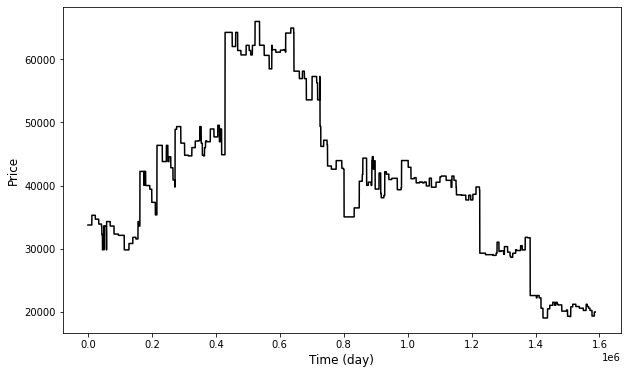

In [6]:


# Define a function to draw time_series plot
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Price', {'fontsize': 12})
    

dataset = df.copy()
timeseries(df.index, dataset['adj_close'], 'Time (day)')

# dataset['month'] = dataset.index.month
# dataset_by_month = dataset.resample('M').sum()
# timeseries(dataset_by_month.index, dataset_by_month['WC'], 'Time (month)')

# dataset['year'] = dataset.index.year
# dataset_by_year = dataset.resample('Y').sum()
# timeseries(dataset_by_year.index, dataset_by_year['WC'], 'Time (month)')

In [7]:
df = df[['user_followers','user_verified','high','low', 'volume','adj_close','Vader_Comp']]

In [8]:
df['user_verified'] = df['user_verified'].astype(int)

In [9]:
df['user_verified'][9]

0

In [10]:
# Split train data and test data
train_size = int(len(df)*0.8)

# train_data = df.WC.loc[:train_size] -----> it gives a series
# Do not forget use iloc to select a number of rows
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [11]:
# Scale data
# The input to scaler.fit -> array-like, sparse matrix, dataframe of shape (n_samples, n_features)
scaler = MinMaxScaler().fit(train_data)

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [12]:
# Create input dataset
# Th input shape should be [samples, time steps, features]
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
        
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train_scaled,30)
X_test, y_test = create_dataset(test_scaled,30)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1269309, 30, 7)
y_train.shape:  (1269309, 7)
X_test.shape:  (317305, 30, 7)
y_test.shape:  (317305, 7)


In [13]:
X_test[:33].shape

(33, 30, 7)

In [16]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer 
    model.add(GRU (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
   
    return model
model_gru = create_gru(64)

# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model

model_bilstm = create_bilstm(64)

def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 8, validation_split = 0.2,
                    batch_size = 16, shuffle = False, callbacks = [early_stop])
    return history

history_gru = fit_model(model_gru)
history_bilstm = fit_model(model_bilstm)

Epoch 1/8
63466/63466 [==============================] - 391s 6ms/step - loss: 0.0802 - val_loss: 0.0848
Epoch 2/8
63466/63466 [==============================] - 386s 6ms/step - loss: 0.0802 - val_loss: 0.0820
Epoch 3/8
63466/63466 [==============================] - 387s 6ms/step - loss: 0.0802 - val_loss: 0.0776
Epoch 4/8
63466/63466 [==============================] - 392s 6ms/step - loss: 0.0802 - val_loss: 0.0725
Epoch 5/8
63466/63466 [==============================] - 400s 6ms/step - loss: 0.0802 - val_loss: 0.0693
Epoch 6/8
63466/63466 [==============================] - 400s 6ms/step - loss: 0.0802 - val_loss: 0.0671
Epoch 7/8
63466/63466 [==============================] - 400s 6ms/step - loss: 0.0802 - val_loss: 0.0664
Epoch 8/8
63466/63466 [==============================] - 417s 7ms/step - loss: 0.0802 - val_loss: 0.0673
Epoch 1/8
63466/63466 [==============================] - 703s 11ms/step - loss: 0.0802 - val_loss: 0.0808
Epoch 2/8
63466/63466 [==============================]

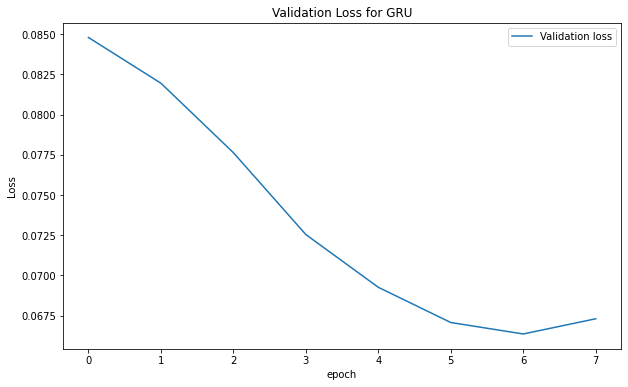

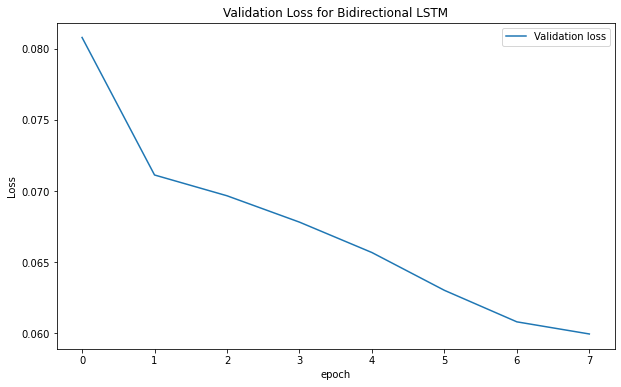

In [20]:
# Plot train loss and validation loss
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    # plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Validation loss'], loc='upper right')
    # plt.savefig('C:/Users/nious/Documents/Medium/Time series/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

# Transform data back to original data space
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)



9916/9916 [==============================] - 26s 3ms/step
<class 'numpy.ndarray'>
9916/9916 [==============================] - 45s 4ms/step
<class 'numpy.ndarray'>
GRU:
Mean Absolute Error: 248048752925097426944.0000
Root Mean Square Error: 704100482562579890176.0000

Bidirectiona LSTM:
Mean Absolute Error: 248048752925097426944.0000
Root Mean Square Error: 704100482562579890176.0000



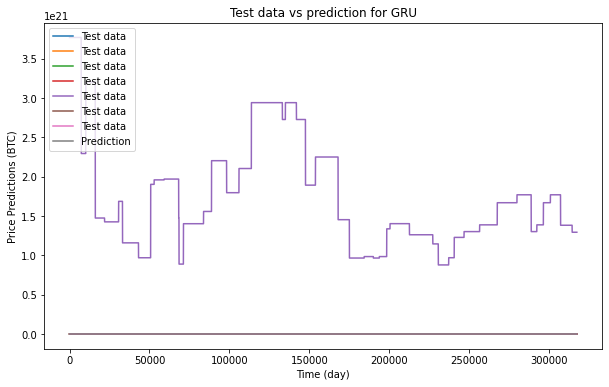

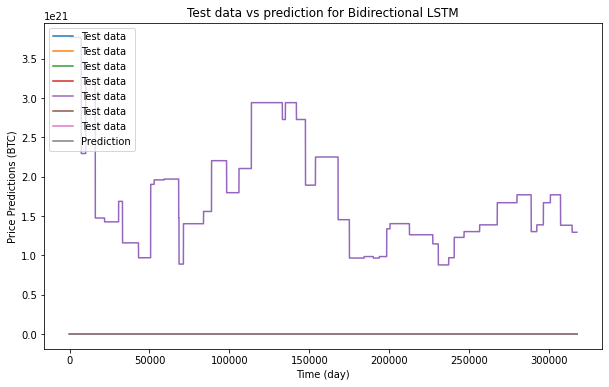

In [24]:
# Make prediction


def prediction(model):
    prediction = model.predict(X_test)
    print(type(prediction))
    # prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='Test data')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Price Predictions (BTC)')
       
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectiona LSTM')

In [25]:
# Select 60 days of data from test data
new_data = test_data.iloc[100:160]
# Scale the input
scaled_data = scaler.transform(new_data)
# Reshape the input 
def create_dataset (X, look_back = 1):
    Xs = []
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        
    return np.array(Xs)

X_30= create_dataset(scaled_data,30)
print('X_30.shape: ', X_30.shape) 

X_30.shape:  (30, 30, 7)


1/1 [==============================] - 0s 20ms/step


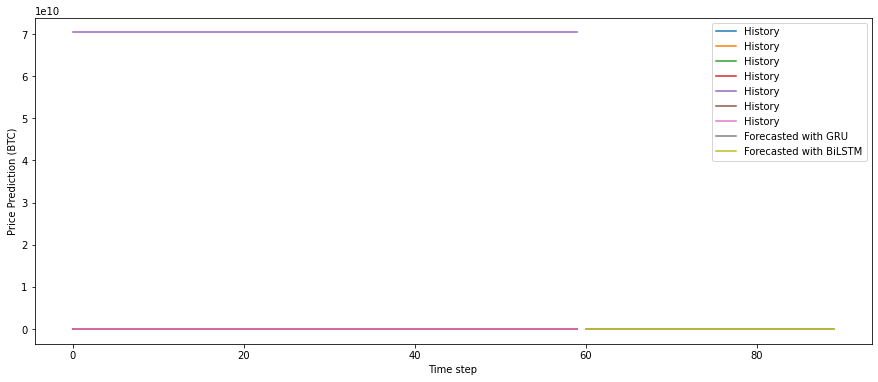

In [26]:
# Make prediction for new data
def prediction(model):
    prediction = model.predict(X_30)
    # prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

# Plot history and future
def plot_multi_step(history, prediction1, prediction2):
    
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with GRU')
    plt.plot(range_future, np.array(prediction2),label='Forecasted with BiLSTM')
    
    plt.legend(loc='upper right')
    plt.xlabel('Time step')
    plt.ylabel('Price Prediction (BTC)')
   
    
plot_multi_step(new_data, prediction_gru, prediction_bilstm)